In [102]:
# to ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [103]:
import pandas as pd
import numpy as np
import os
import shutil
import glob
import matplotlib.pyplot as plt

In [104]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [105]:
train_path  = "/content/drive/MyDrive/final_images_model/train"
valid_path  = "/content/drive/MyDrive/final_images_model/validation"
test_path   = "/content/drive/MyDrive/final_images_model/test"

In [106]:
from keras.preprocessing.image import ImageDataGenerator

from keras.models import Model
from keras.layers import Dense, MaxPool2D, Conv2D
import keras

In [107]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

In [108]:
train_data_gen = ImageDataGenerator(preprocessing_function= preprocess_input,
                                    zoom_range= 0.2,
                                    horizontal_flip= True,
                                    shear_range= 0.2,

                                    )

train = train_data_gen.flow_from_directory(directory= train_path,
                                           target_size=(224,224))

Found 6822 images belonging to 2 classes.


In [109]:
validation_data_gen = ImageDataGenerator(preprocessing_function= preprocess_input  )

valid = validation_data_gen.flow_from_directory(directory= valid_path,
                                                target_size=(224,224))

Found 800 images belonging to 2 classes.


In [110]:

test_data_gen = ImageDataGenerator(preprocessing_function= preprocess_input )

test = train_data_gen.flow_from_directory(directory= test_path ,
                                          target_size=(224,224),
                                          shuffle= False)

Found 800 images belonging to 2 classes.


In [111]:

# Covid +ve X-Ray is represented by 0 and Normal is represented by 1

class_type = {0:'Covid',  1 : 'Normal'}


In [112]:
# to visualize the images in the traing data denerator
t_img , label = train.next()

In [113]:
# function when called will prot the images

def plotImages(img_arr, label):
  """
  input  :- images array
  output :- plots the images
  """

  for im, l in zip(img_arr,label) :
    plt.figure(figsize= (5,5))
    plt.imshow(im, cmap = 'gray')
    plt.title(im.shape)
    plt.axis = False
    plt.show()

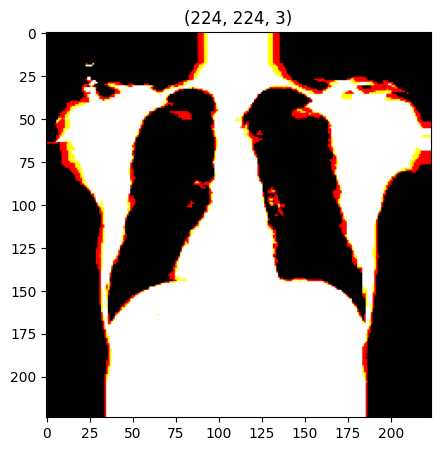

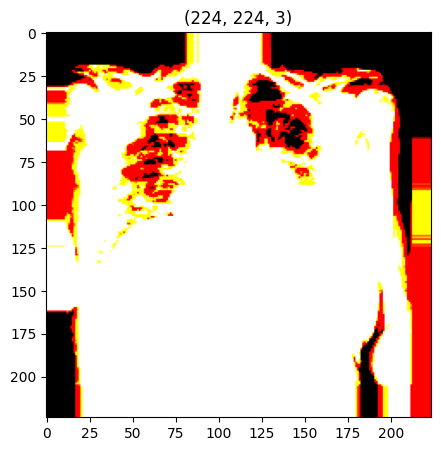

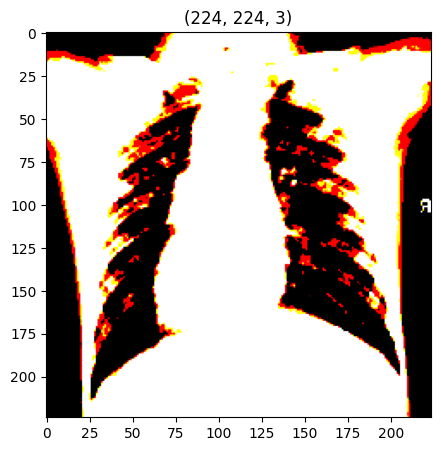

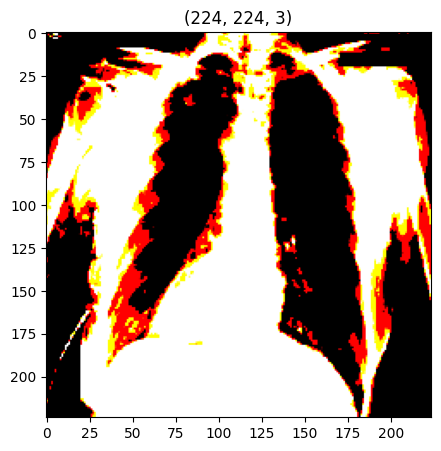

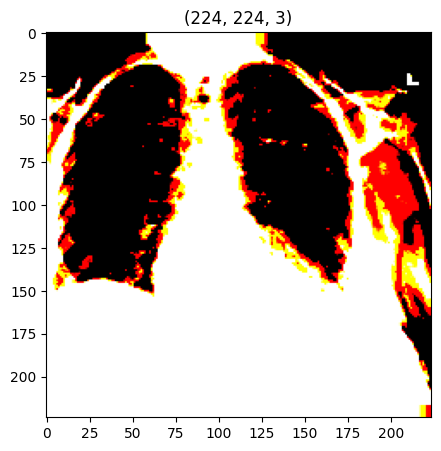

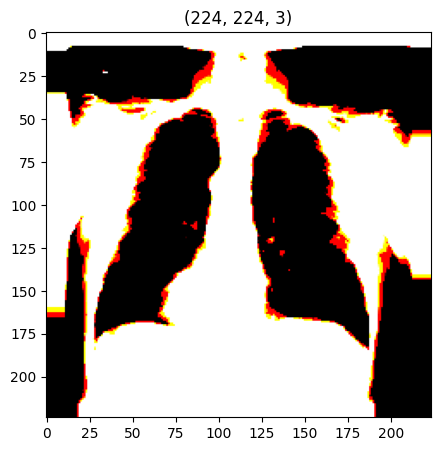

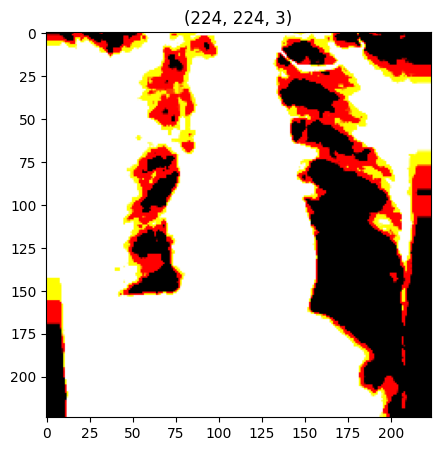

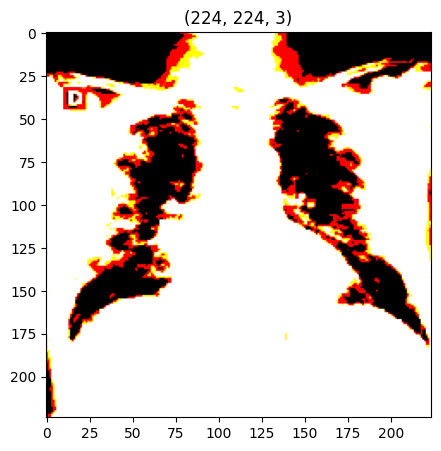

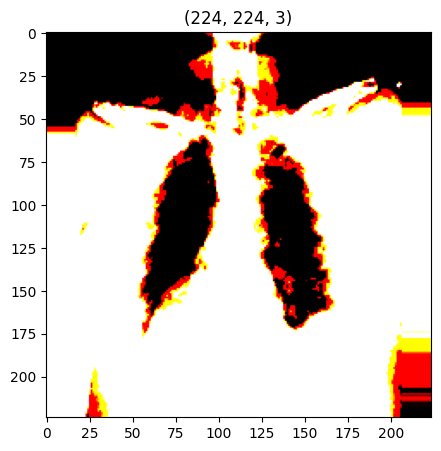

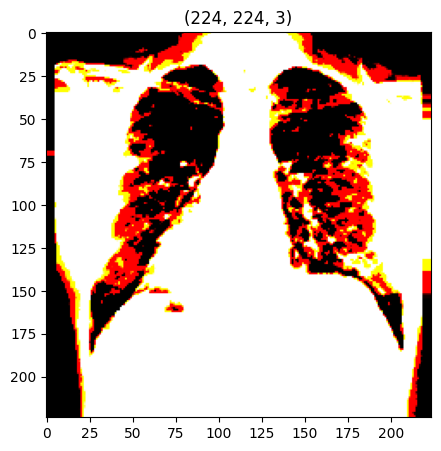

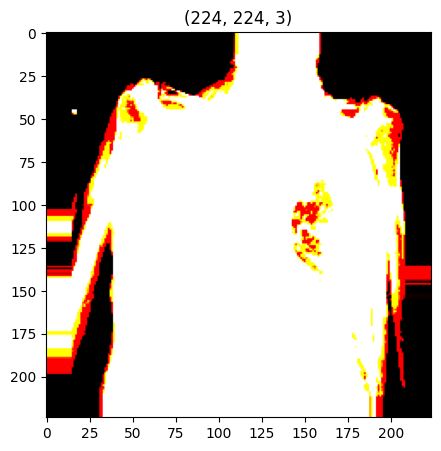

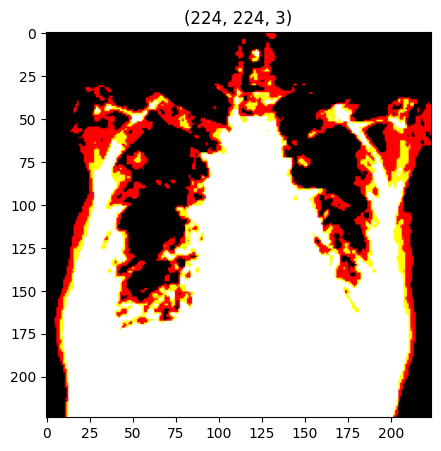

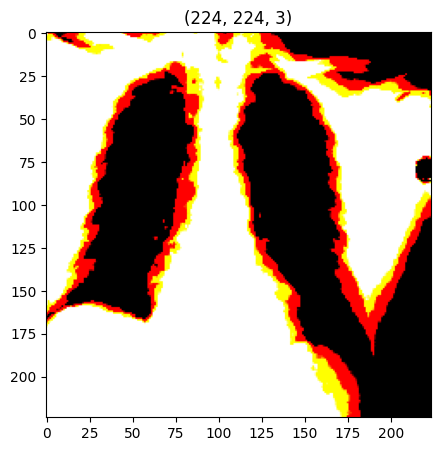

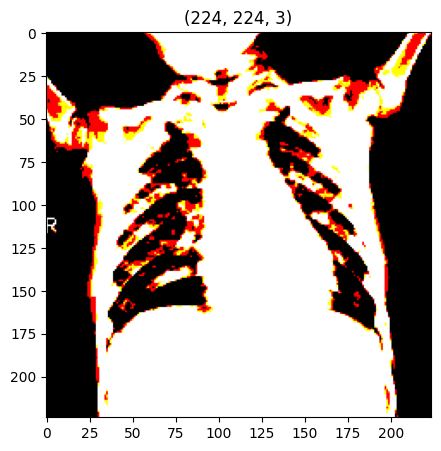

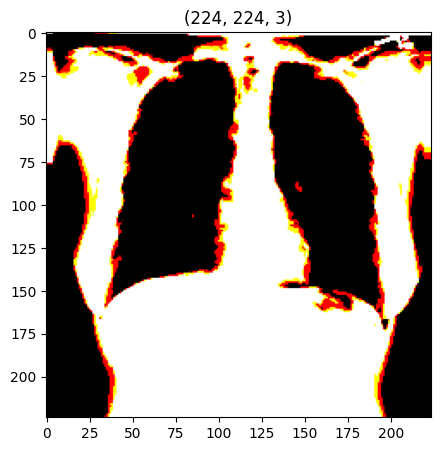

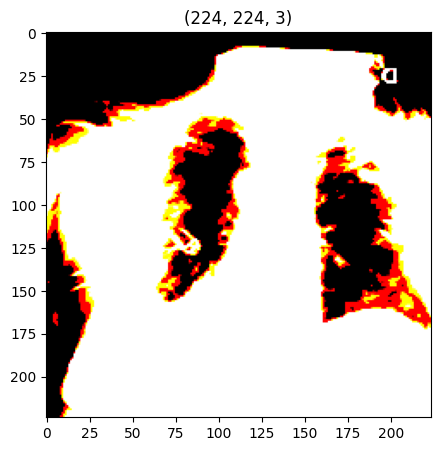

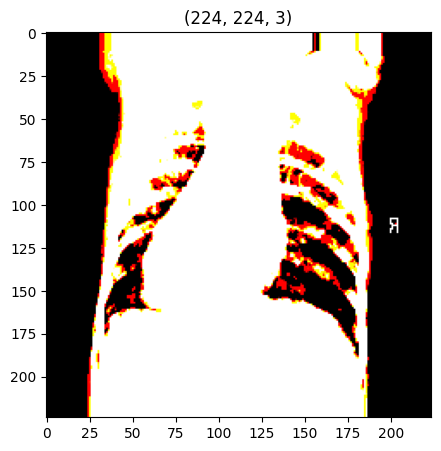

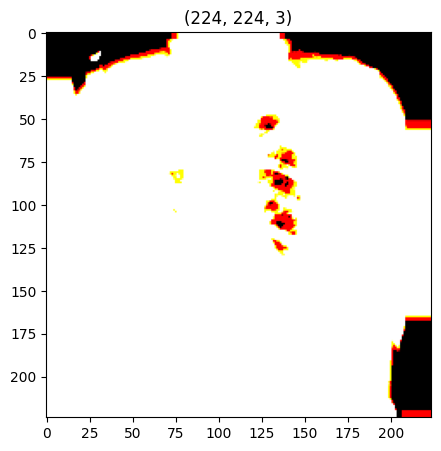

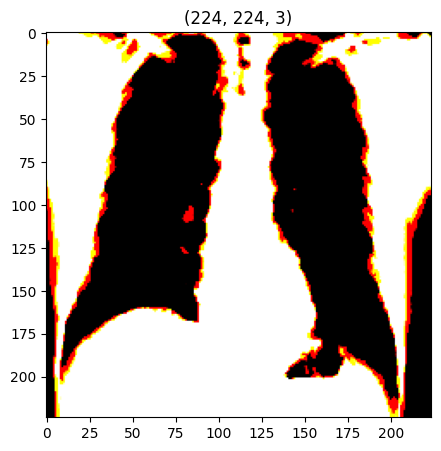

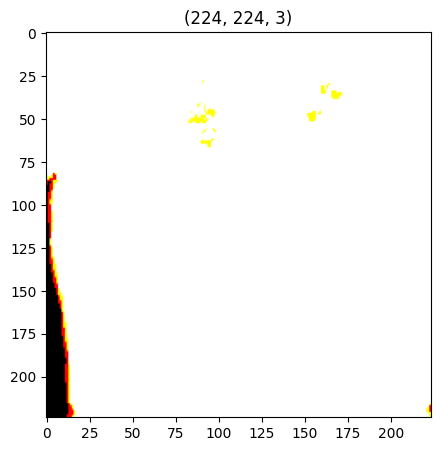

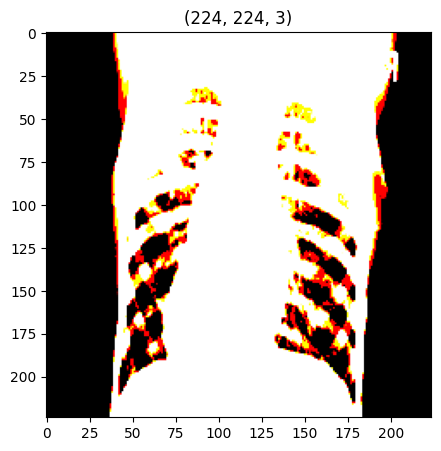

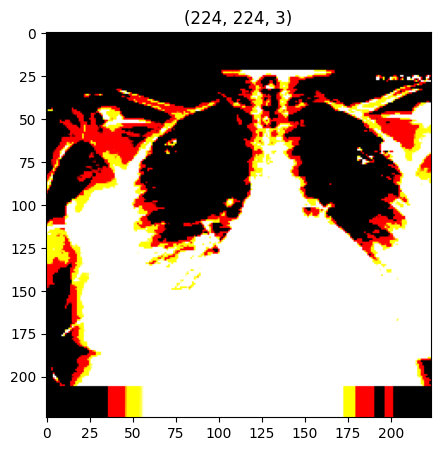

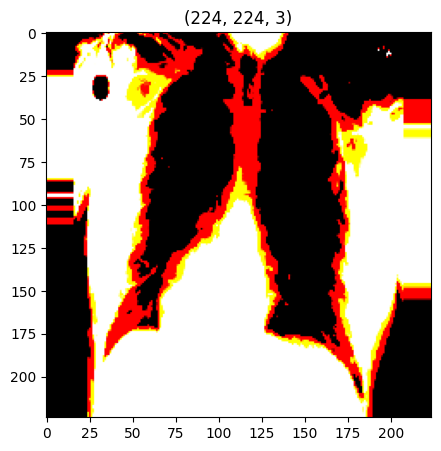

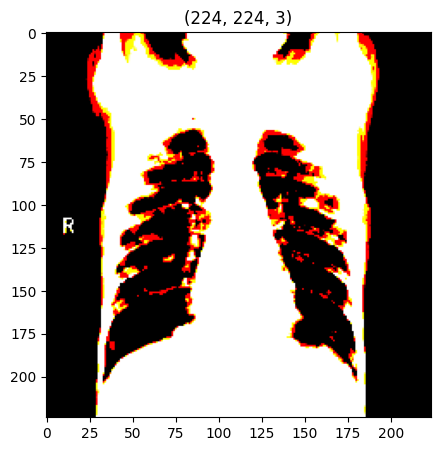

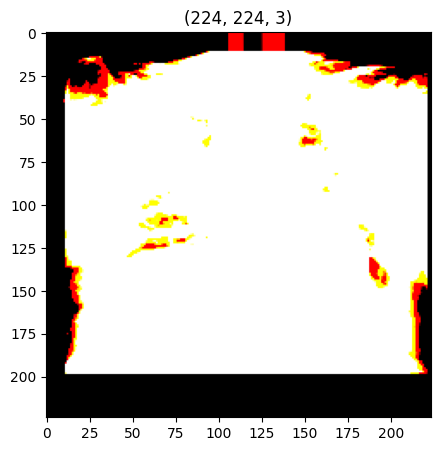

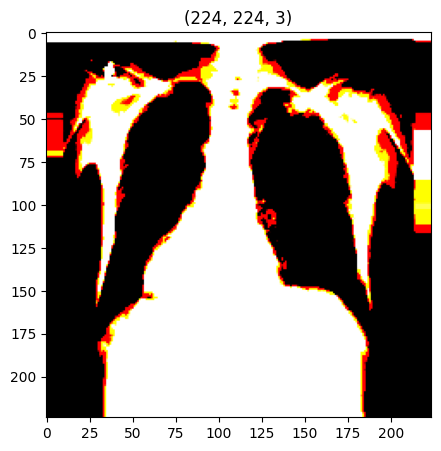

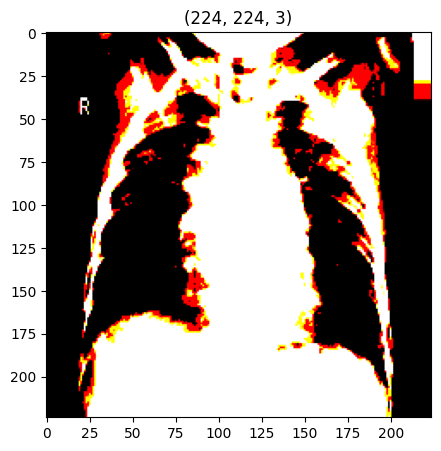

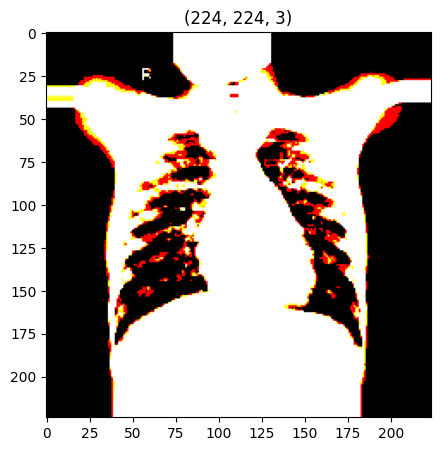

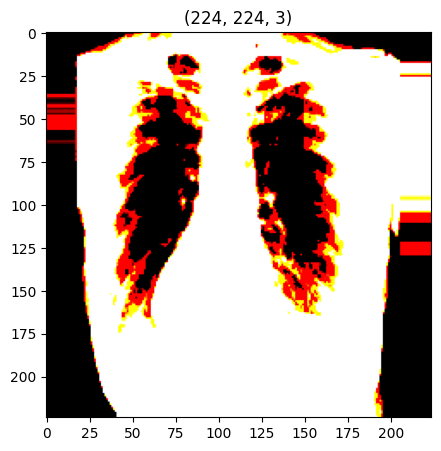

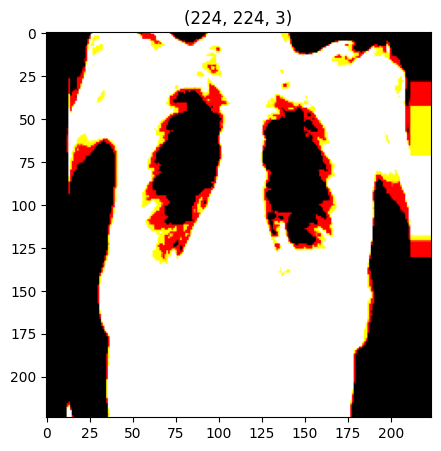

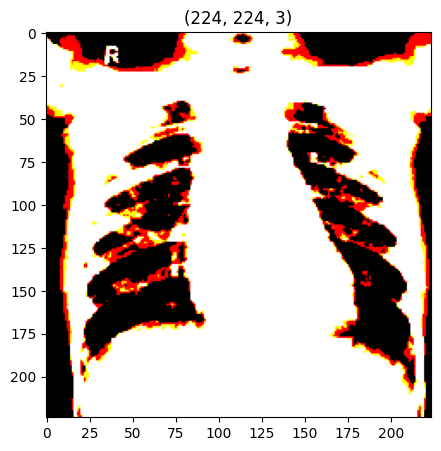

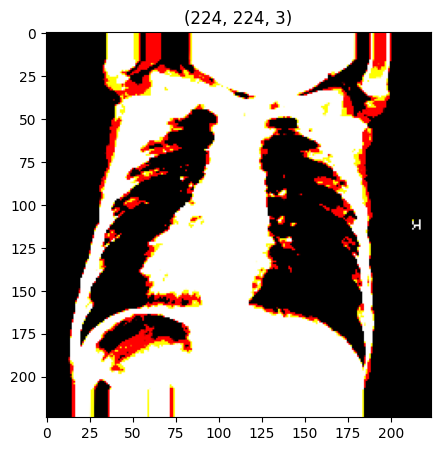

In [114]:
# function call to plot the images

plotImages(t_img, label)

In [115]:
from keras.layers import Flatten , Dense, Dropout , MaxPool2D

In [116]:
res = ResNet50( input_shape=(224,224,3), include_top= False) # include_top w

In [117]:

for layer in res.layers:           # Dont Train the parameters again
  layer.trainable = False

In [118]:
x = Flatten()(res.output)
x = Dense(units=2 , activation='sigmoid', name = 'predictions' )(x)

# creating our model.
model = Model(res.input, x)

In [119]:

model.summary()

Model: "model_14"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [120]:
model.compile( optimizer= 'adam' , loss = 'categorical_crossentropy', metrics=['accuracy'])

In [121]:
# implementing early stopping and model check point

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor= "val_accuracy" , min_delta= 0.01, patience= 3, verbose=1)
mc = ModelCheckpoint(filepath="bestmodel.h5", monitor="val_accuracy", verbose=1, save_best_only= True)

In [122]:
hist = model.fit_generator(train, steps_per_epoch= 10, epochs= 30, validation_data= valid , validation_steps= 16, callbacks=[es,mc])

Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 14.1512 - accuracy: 0.5625 
Epoch 1: val_accuracy improved from -inf to 0.53516, saving model to bestmodel.h5
10/10 [==============================] - 229s 23s/step - loss: 14.1512 - accuracy: 0.5625 - val_loss: 12.1308 - val_accuracy: 0.5352
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 5.4102 - accuracy: 0.8062 
Epoch 2: val_accuracy improved from 0.53516 to 0.66992, saving model to bestmodel.h5
10/10 [==============================] - 252s 26s/step - loss: 5.4102 - accuracy: 0.8062 - val_loss: 9.7844 - val_accuracy: 0.6699
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 2.6784 - accuracy: 0.8531 
Epoch 3: val_accuracy improved from 0.66992 to 0.68945, saving model to bestmodel.h5
10/10 [==============================] - 214s 22s/step - loss: 2.6784 - accuracy: 0.8531 - val_loss: 10.4384 - val_accuracy: 0.6895
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss

In [140]:
## load only the best model
from keras.models import load_model
model = load_model("bestmodel.h5")


In [124]:

h = hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

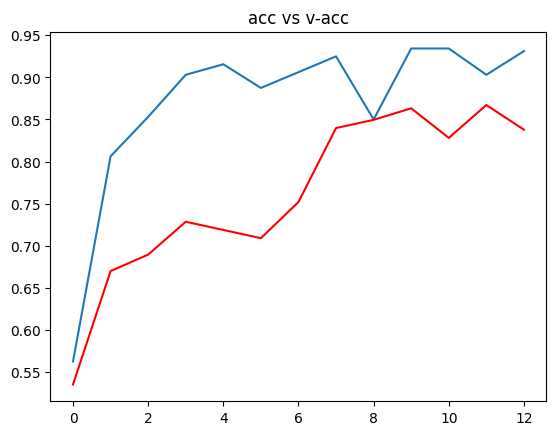

In [125]:
plt.plot(h['accuracy'],label= "acc")
plt.plot(h['val_accuracy'] , c = "red",label='val_acc')
plt.title("acc vs v-acc")
plt.show()

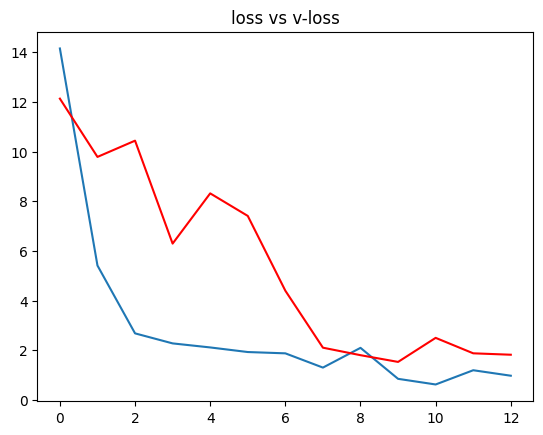

In [126]:

plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [127]:
# checking out the accurscy of our model

acc = model.evaluate_generator(generator= test)[1]

print(f"The accuracy of your model is = {acc} %")

The accuracy of your model is = 0.8587499856948853 %


In [ ]:

import keras.utils as image

def get_img_array(img_path):
  """
  Input : Takes in image path as input
  Output : Gives out Pre-Processed image
  """
  path = img_path
  img = image.load_img(path, target_size=(224,224,3))
  img = image.img_to_array(img)
  img = np.expand_dims(img , axis= 0 )

  return img

In [ ]:
# path for that new image. ( you can take it either from google or any other scource)
import keras.utils as image
path = "/content/drive/MyDrive/final_images_model/test/COVID/COVID-2857.png"       # you can add any image path


img = get_img_array(path)

res = class_type[np.argmax(model.predict(img))]
print(f"The given X-Ray image is of type = {res}")
print()
print(f"The chances of image being Covid is : {model.predict(img)[0][0]*100} percent")
print()
print(f"The chances of image being Normal is : {model.predict(img)[0][1]*100} percent")


# to display the image
plt.imshow(img[0]/255, cmap = "gray")
plt.title("input image")
plt.show()

In [ ]:
import tensorflow as tf

In [ ]:

# this function is udes to generate the heat map of aan image
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [132]:
import matplotlib.cm as cm

from IPython.display import Image, display
from keras.utils import load_img, img_to_array, array_to_img

In [133]:
def save_and_display_gradcam(img_path , heatmap, cam_path="cam.jpg", alpha=0.4):
    """
    img input shoud not be expanded
    """

    # Load the original image
    img = load_img(img_path)
    img = img_to_array(img)


    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap =array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap =img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))

In [134]:
# function that is used to predict the image type and the ares that are affected by covid


def image_prediction_and_visualization(path,last_conv_layer_name = "conv5_block3_3_conv", model = model):
  """
  input:  is the image path, name of last convolution layer , model name
  output : returs the predictions and the area that is effected
  """

  img_array = get_img_array(path)

  heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

  plt.title("the heat map of the image is ")
  plt.imshow(heatmap)
  plt.show()
  print()
  img = get_img_array(path)

  res = class_type[np.argmax(model.predict(img))]
  print(f"The given X-Ray image is of type = {res}")
  print()
  print(f"The chances of image being Covid is : {model.predict(img)[0][0]*100} %")
  print(f"The chances of image being Normal is : {model.predict(img)[0][1]*100} %")

  print()
  print("image with heatmap representing region on interest")

  # function call
  save_and_display_gradcam(path, heatmap)

  print()
  print("the original input image")
  print()

  a = plt.imread(path)
  plt.imshow(a, cmap = "gray")
  plt.title("Original image")
  plt.show()

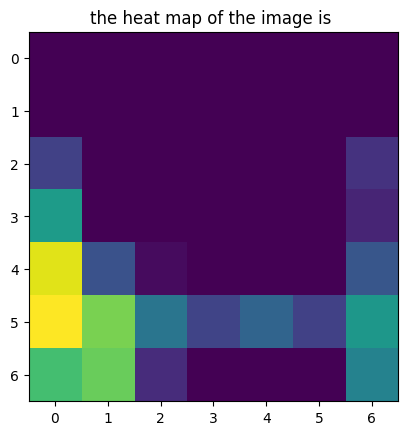


1/1 [==============================] - 0s 204ms/step
The given X-Ray image is of type = Covid

1/1 [==============================] - 0s 221ms/step
The chances of image being Covid is : 88.74723315238953 %
1/1 [==============================] - 0s 204ms/step
The chances of image being Normal is : 0.4485666751861572 %

image with heatmap representing region on interest


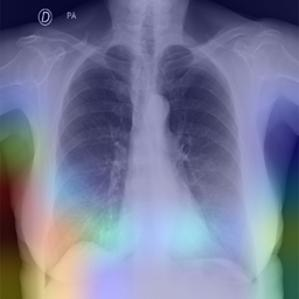


the original input image



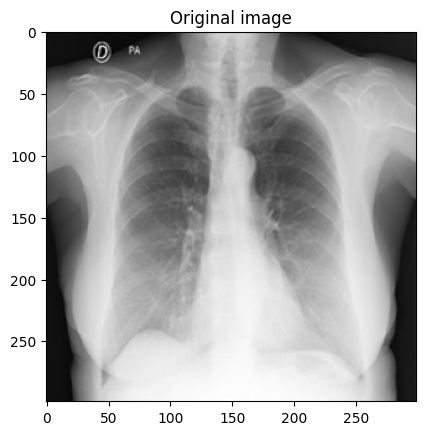

In [135]:
#predictions
# provide the path of any image from google or any other scource
# the path is already defigned above , but you can also provide the path here to avoid scrolling up

# for covid image :  path:- provide any image from google or provide image from all image folder
path = "/content/drive/MyDrive/final_images_model/test/COVID/COVID-3000.png"

image_prediction_and_visualization(path)

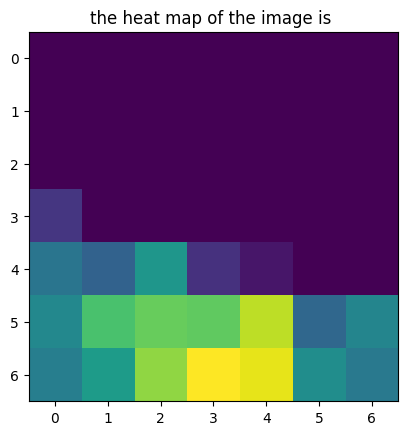


1/1 [==============================] - 0s 214ms/step
The given X-Ray image is of type = Covid

1/1 [==============================] - 0s 210ms/step
The chances of image being Covid is : 91.03931188583374 %
1/1 [==============================] - 0s 223ms/step
The chances of image being Normal is : 4.92786318063736 %

image with heatmap representing region on interest


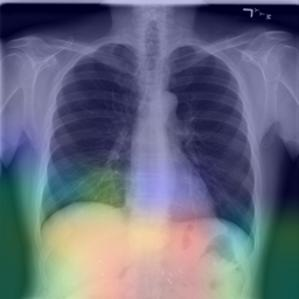


the original input image



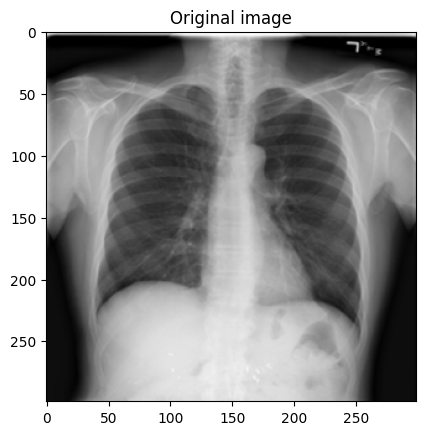

In [136]:
# for normal image :  path:- provide any image from google or provide image from all image folder
path = "/content/drive/MyDrive/final_images_model/test/Normal/Normal-4043.png"

image_prediction_and_visualization(path)

# for a healthey chest x-Ray heat map will be white thus the x-ray will look blue

In [137]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(test)
y_pred = np.argmax(y_pred, axis=1)
# Get true classes
#y_true = np.argmax(test_labels, axis=1)
cm = confusion_matrix(test.classes, y_pred)

25/25 [==============================] - 168s 7s/step


In [ ]:
cm

In [ ]:

import seaborn as sns
sns.heatmap(cm, annot=True,fmt='d')